In [7]:
import matplotlib.pyplot as plt
import torch
import os
from prosailvae.dist_utils import truncated_gaussian_pdf
from prosailvae.prosail_var_dists import get_prosail_var_dist
import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

In [11]:
var_dist = get_prosail_var_dist("new_v2")
res_dir = "/home/yoel/Documents/Dev/PROSAIL-VAE/prosailvae/results/sampling_dist_plots"
if not os.path.isdir(res_dir):
    os.makedirs(res_dir)


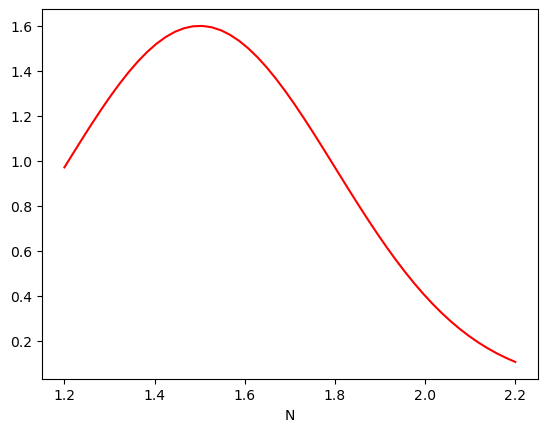

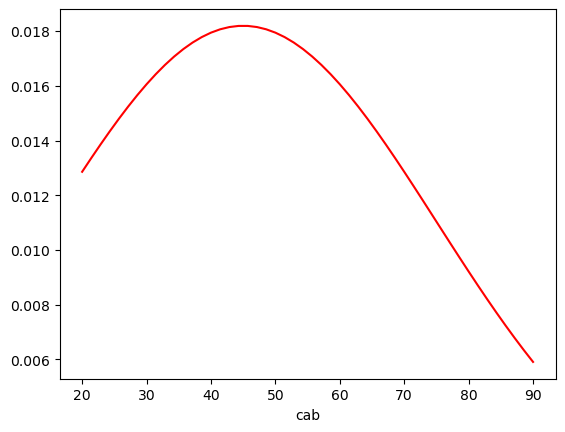

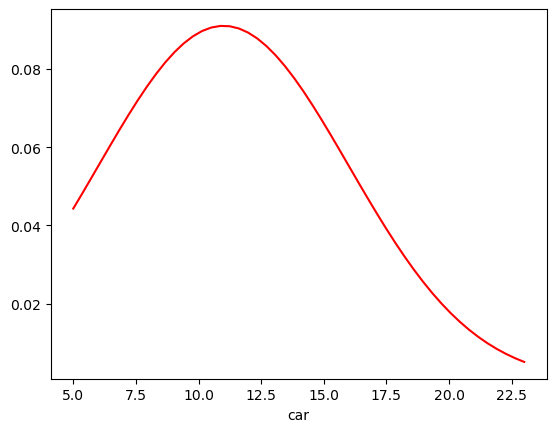

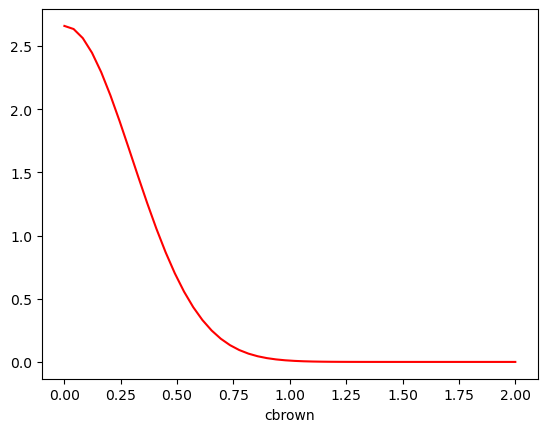

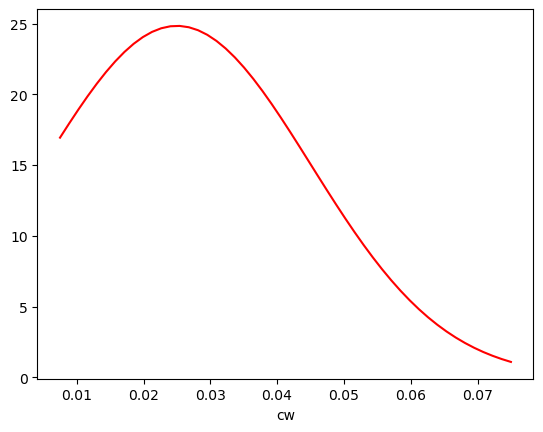

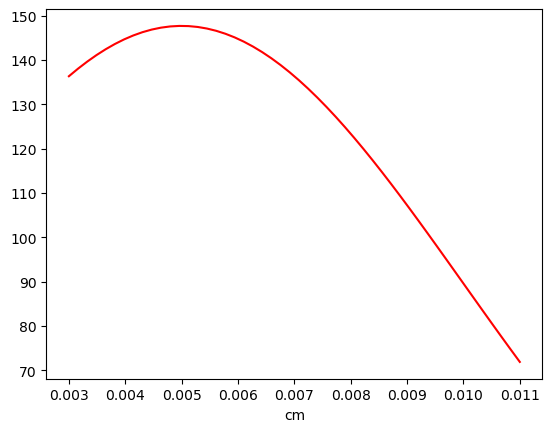

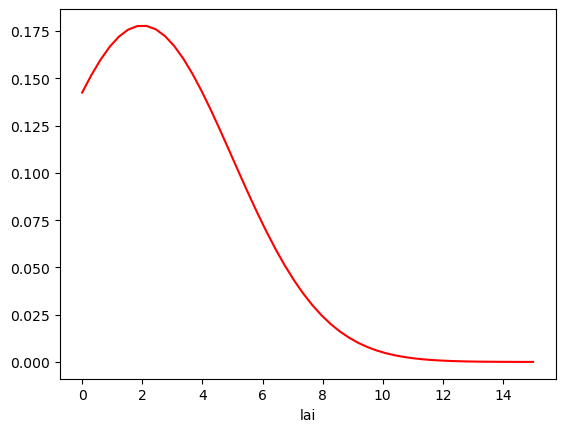

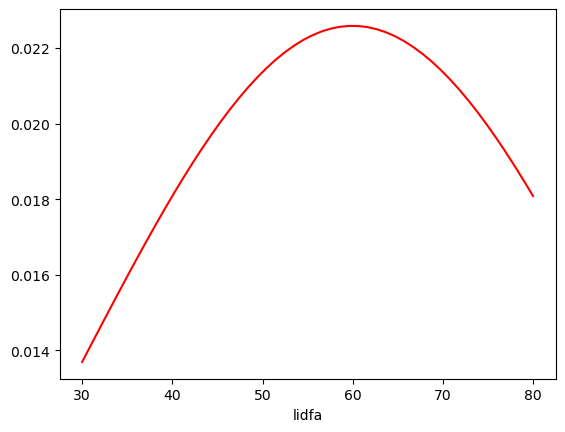

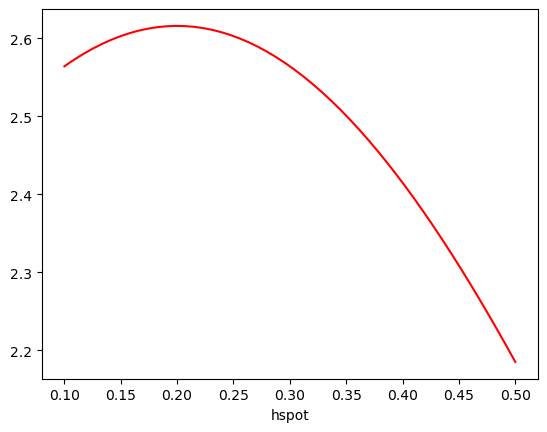

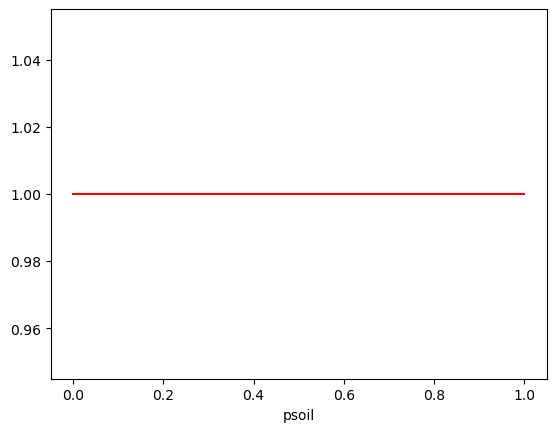

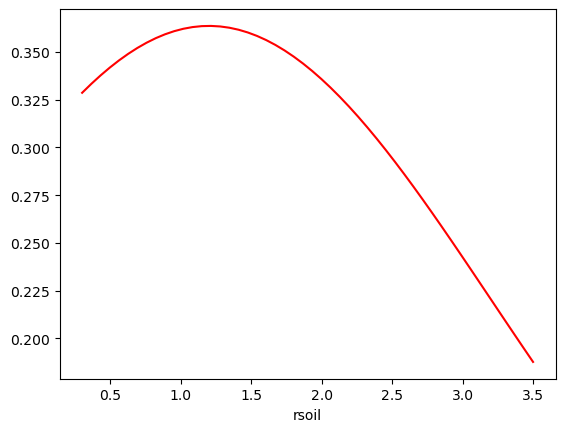

In [13]:
n = 50
for i, (key, dist) in enumerate(var_dist.asdict().items()):
    fig, ax = plt.subplots()
    if dist ['law'] == "gaussian":
        x = torch.linspace(dist['low'], dist['high'], n)
        y = truncated_gaussian_pdf(x=x, mu=torch.as_tensor(dist["loc"]), 
                                   sigma=torch.as_tensor(dist['scale']), 
                                   lower=torch.as_tensor(dist['low']), 
                                   upper=torch.as_tensor(dist['high']))
        ax.plot(x, y, 'r')
    else:
        y = 1 / (dist['high'] - dist['low'])
        ax.plot(dist['low'], dist['high'], [y, y], 'r')
    ax.set_xlabel(key)
    tikzplotlib_fix_ncols(fig)
    tikzplotlib.save(os.path.join(res_dir, f'{key}_sampling_dist.tex'))
